In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(123)

In [ ]:
num_observations=5000
x1=np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]],num_observations) 

x2=np.random.multivariate_normal([0,3],[[1,0.75],[0.75,1]],num_observations)

simulated_features=np.vstack((x1,x2)).astype(np.float32)
simulated_lables=np.hstack((np.zeros(num_observations),np.ones(num_observations)))

In [ ]:
plt.figure(figsize=(13,9)) # to set our own fig size
plt.scatter(simulated_features[:,0],simulated_features[:,1],c=simulated_lables,alpha=0.5)
# x=[1,2,3,4,5]
# y=[5,4,3,2,1]
# plt.plot(x,y)

# define the sigmoid function

In [ ]:
def sigmoid(scores):
    return 1/(1+np.exp(-scores))

# calculate the log likelihood

In [6]:
def log_likelihood(features,target,weights):
    scores=np.dot(features,weights)
    ll=np.sum(target*scores-np.log(1+np.exp(scores)))
    return ll

# Build a logistic function

In [18]:
def logistic_regression(features,target,num_steps,learning_rate,add_intercept=True):
    if add_intercept:
        intercept=np.ones((features.shape[0],1)) # initialize with ones
        features=np.hstack((intercept,features)) # horizantal stacking
    
    weights=np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores=np.dot(features,weights)
        predictions=sigmoid(scores)
        
        #update weigths with gradient decent
        output_error=target-predictions
        gradient=np.dot(features.T,output_error)
        weights+=learning_rate*gradient
        
        # prin log likeihood for every step
        if step%1000==0:
            print(log_likelihood(features,target,weights))
            
    return weights

In [21]:
weights= logistic_regression(simulated_features,simulated_lables,10000,0.0001,True)

-4399.84669239
-326.88563261
-304.879150685
-298.470530791
-295.862635684
-294.633328218
-294.004345851
-293.665589512
-293.476775779
-293.368983967


In [22]:
print (weights)

[-10.25970432  -5.10620634   6.88995835]


# comapre with scikit learn

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(fit_intercept=True,C=0.0001)
clf.fit(simulated_features,simulated_lables)
print(  clf.intercept_ ,clf.coef_)
print(weights)

(array([-0.09692017]), array([[-0.04720961,  0.35385901]]))
[-10.25970432  -5.10620634   6.88995835]


#  Accuracy testing

In [27]:
data_with_intercept = np.hstack((np.ones((simulated_features.shape[0],1)),simulated_features))
final_scores=np.dot(data_with_intercept,weights)
preds=np.round(sigmoid(final_scores))

print("accuracy from scratch :{}".format((preds==simulated_lables).sum().astype(float)/len(preds)))

print("accuracy feom sklearn: {}".format(clf.score(simulated_features,simulated_lables)))

accuracy from scratch :0.9897
accuracy feom sklearn: 0.8096


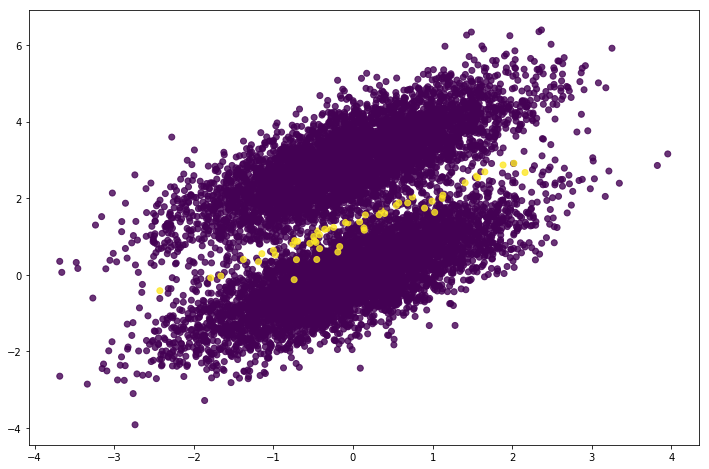

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_features[:,0],simulated_features[:,1],c=preds==simulated_lables-1,alpha=0.8)

# Data frames

In [29]:
import pandas as pd

In [36]:
a=pd.DataFrame(simulated_features)
a.head(3)

,0,1
0,0.662900,1.368129
1,0.267853,-0.797258
2,-0.042640,1.125102


# try to building boosting model